In [11]:
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_blobs

In [2]:
# Create a random number generator
rng = np.random.default_rng(seed=42)

# Create synthetic data with 'unknown' number of clusters
centers = rng.integers(low=3, high=7)
x, y, z = make_blobs(
    n_samples=1000, n_features=6, centers=centers, return_centers=True, random_state=42
)

In [6]:
# Create a pandas dataframe
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5
0,6.597330,-5.250127,-6.682249,-7.361722,-4.038499,0.804176
1,-9.754520,6.491701,1.955122,3.445692,-8.906258,10.885443
2,-0.876786,7.584145,4.199834,2.103910,-5.438354,-8.315972
3,-10.205186,7.916090,-0.682091,3.531567,-10.076584,10.031524
4,-1.967735,9.773441,4.063368,-0.617873,-7.425872,-6.488306


In [9]:
# Scale the data
x_scaled = pd.DataFrame(StandardScaler().fit_transform(x))
x_scaled.head()

,0,1,2,3,4,5
0,1.263180,-1.305187,-1.400255,-1.561534,1.109792,-0.026596
1,-1.270689,0.446790,0.394165,0.735048,-0.857313,1.471237
2,0.104997,0.609791,0.860506,0.449918,0.544098,-1.381630
3,-1.340524,0.659320,-0.153718,0.753296,-1.330253,1.344365
4,-0.064055,0.936452,0.832155,-0.128462,-0.259076,-1.110083


In [10]:
num_clusters = [i for i in range(2, 11)]


def kmeans_inertia(num_clusters, x_vals):
    """
    Fits a KMeans model for each value in num_clusters.
    Returns a list containing the inertia of each model.
    """
    inertia = []
    for n in num_clusters:
        model = KMeans(n_clusters=n, random_state=42, n_init="auto")
        model.fit(x_vals)
        inertia.append(model.inertia_)

    return inertia

Text(0, 0.5, 'Inertia')

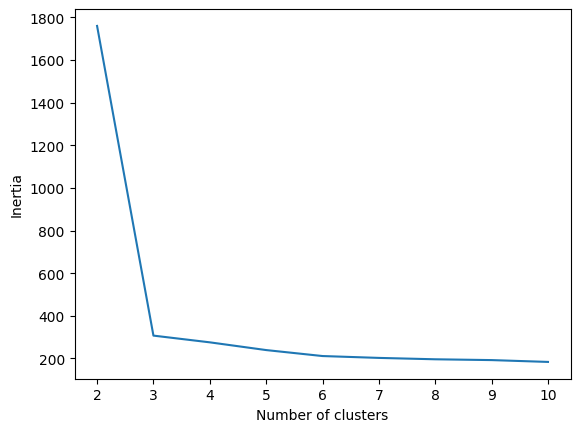

In [13]:
inertia = kmeans_inertia(num_clusters, x_scaled)
plot = sns.lineplot(x=num_clusters, y=inertia)
plot.set_xlabel("Number of clusters")
plot.set_ylabel("Inertia")

In [ ]:
# A three-cluster model seems optimal

In [15]:
num_clusters = [i for i in range(2, 11)]


def kmeans_sil(num_clusters, x_vals):
    """
    Fits a KMeans model for each value in num_clusters.
    Returns a list containing the silhoutte score of each model.
    """
    silhoutte = []
    for n in num_clusters:
        model = KMeans(n_clusters=n, random_state=42, n_init="auto")
        model.fit(x_vals)
        silhoutte.append(silhouette_score(x_vals, model.labels_))

    return silhoutte

Text(0, 0.5, 'Silhoutte score')

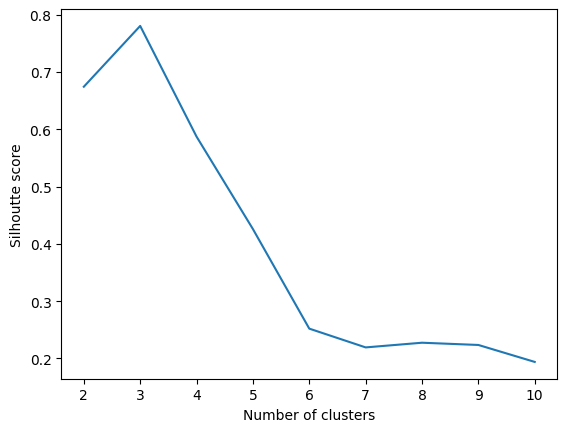

In [16]:
sil = kmeans_sil(num_clusters, x_scaled)
plot = sns.lineplot(x=num_clusters, y=sil)
plot.set_xlabel("Number of clusters")
plot.set_ylabel("Silhoutte score")

In [18]:
# A model with 3 cluster indeed is the optimal model
print(centers)

3


In [19]:
# Create a new column that indicates the cluster in the unscaled dataframe
model = KMeans(n_clusters=3, random_state=42, n_init="auto")
model.fit(x_scaled)
x["cluster"] = model.labels_
x.head()

,0,1,2,3,4,5,cluster
0,6.597330,-5.250127,-6.682249,-7.361722,-4.038499,0.804176,0
1,-9.754520,6.491701,1.955122,3.445692,-8.906258,10.885443,1
2,-0.876786,7.584145,4.199834,2.103910,-5.438354,-8.315972,2
3,-10.205186,7.916090,-0.682091,3.531567,-10.076584,10.031524,1
4,-1.967735,9.773441,4.063368,-0.617873,-7.425872,-6.488306,2
